Problem 1: Auto-encoding MNIST examples
---------------------------------------

You are provided with MNIST dataset as ‘mnist.mat’. It has 2 matrices, ‘fea’ of size 70,000x784, i.e. 70,000 examples of hand written digits of size 28x28. ‘gnd’ is the class label 0-9 (10 classes). Use the sample code Autoencoder.py and modify accordingly. You may use any other open source Autoencoder code for the purpose. Split the data into Training and Testing as 80-20%.
Tasks:
1. Choose a decent Learning Rate and Report Convergence.
2. Report the behavior (Loss Curve) with varying number of Hidden units (say
50,100) and intuitively discuss the results.
3. Add some noise to the input and compare the behavior with the previous one. 
4. Visualize the learnt weights.

In [142]:
%matplotlib inline
from matplotlib import pyplot as plt

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy
from keras.layers import Input, Dense
from keras.models import Model

import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

In [143]:
mat_contents = sio.loadmat('mnist.mat')
x = mat_contents['fea']
y = mat_contents['gnd']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(56000, 784) train samples
(14000, 784) test samples


In [144]:
# Normalize features
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
# X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train.shape,X_test.shape

((56000, 784), (14000, 784))

In [145]:
def create_autoencoder(num_features, encoding_dim=50, learning_rate=0.5):
    # this is our input placeholder
    input_img = Input(shape=(num_features,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(num_features, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input=input_img, output=encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))

    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]

    # create the decoder model
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    # Adadelta optimizer
    optimizer_adadelta = keras.optimizers.Adadelta(lr=learning_rate)
    autoencoder.compile(optimizer=optimizer_adadelta, loss='binary_crossentropy')
    
    # Stochastic gradient descent optimizer
    #optimizer_SGD = keras.optimizers.SGD(lr=learning_rate)
    #autoencoder.compile(optimizer=optimizer_SGD, loss='binary_crossentropy')
    
    return encoder, decoder, autoencoder

In [146]:
# from keras.callbacks import TensorBoard
#,callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

**1. Choose a decent Learning Rate and Report Convergence.**

In [147]:
# Settings for Autoencoder

# number of epochs
nb_epoch = 120

# learning rate
learning_rate = 1.0 # default=1 when using adadelta optimizer, use lr < 1 when using SGD

# number of features (28*28)
num_features = X_train.shape[1]

In [148]:
# this is the size of our encoded representations (number of hidden layers)
encoding_dim = 50  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_50 = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))
               

Train on 56000 samples, validate on 56000 samples
Epoch 1/120
56000/56000 [==============================] - 8s - loss: 0.3716 - val_loss: 0.2714
Epoch 2/120
56000/56000 [==============================] - 8s - loss: 0.2612 - val_loss: 0.2496
Epoch 3/120
56000/56000 [==============================] - 8s - loss: 0.2373 - val_loss: 0.2259
Epoch 4/120
56000/56000 [==============================] - 8s - loss: 0.2168 - val_loss: 0.2087
Epoch 5/120
56000/56000 [==============================] - 8s - loss: 0.2025 - val_loss: 0.1967
Epoch 6/120
56000/56000 [==============================] - 8s - loss: 0.1921 - val_loss: 0.1877
Epoch 7/120
56000/56000 [==============================] - 8s - loss: 0.1840 - val_loss: 0.1804
Epoch 8/120
56000/56000 [==============================] - 8s - loss: 0.1773 - val_loss: 0.1742
Epoch 9/120
56000/56000 [==============================] - 8s - loss: 0.1715 - val_loss: 0.1687
Epoch 10/120
56000/56000 [==============================] - 8s - loss: 0.1662 - val_lo

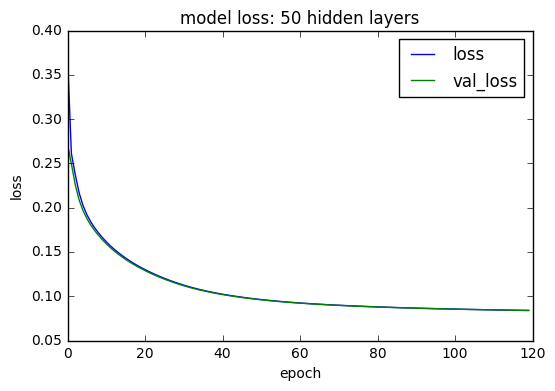

In [149]:
loss_list = AE_50.history.get('loss')
val_loss_list = AE_50.history.get('val_loss')

# summarize history for loss
plt.plot(loss_list)
plt.plot(val_loss_list)
plt.title('model loss: 50 hidden layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

**2. Report the behavior (Loss Curve) with varying number of Hidden units (say 50,100) and intuitively discuss the results. **


In [150]:
# this is the size of our encoded representations (number of hidden layers)
encoding_dim = 100  

encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_100 = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))
               
# score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)

Train on 56000 samples, validate on 56000 samples
Epoch 1/120
56000/56000 [==============================] - 11s - loss: 0.3583 - val_loss: 0.2673
Epoch 2/120
56000/56000 [==============================] - 8s - loss: 0.2542 - val_loss: 0.2403
Epoch 3/120
56000/56000 [==============================] - 8s - loss: 0.2279 - val_loss: 0.2167
Epoch 4/120
56000/56000 [==============================] - 8s - loss: 0.2080 - val_loss: 0.2001
Epoch 5/120
56000/56000 [==============================] - 8s - loss: 0.1939 - val_loss: 0.1882
Epoch 6/120
56000/56000 [==============================] - 8s - loss: 0.1835 - val_loss: 0.1790
Epoch 7/120
56000/56000 [==============================] - 8s - loss: 0.1751 - val_loss: 0.1714
Epoch 8/120
56000/56000 [==============================] - 8s - loss: 0.1681 - val_loss: 0.1649
Epoch 9/120
56000/56000 [==============================] - 8s - loss: 0.1621 - val_loss: 0.1592
Epoch 10/120
56000/56000 [==============================] - 9s - loss: 0.1567 - val_l

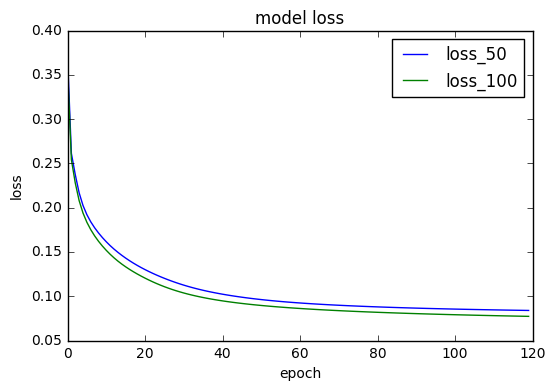

In [151]:
loss_list = AE_50.history.get('loss')
val_loss_list = AE_50.history.get('val_loss')

loss_list_100 = AE_100.history.get('loss')
val_loss_list_100 = AE_100.history.get('val_loss')

# summarize history for loss
plt.plot(loss_list)
plt.plot(loss_list_100)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss_50','loss_100'], loc='upper right')
plt.show()

The loss for 100 hidden layer is lower because there are more dimensions to represented the features.

**3. Add some noise to the input and compare the behavior with the previous one.**

In [152]:
# define noise [0,1]
noise = 0.1
x_noise = np.random.binomial(size = x.shape, n = 1, p = 1.0 - noise) * x

# Normalize features
X_train, X_test, y_train, y_test = train_test_split(x_noise, y, test_size=0.2, random_state=0)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train.shape,X_test.shape

((56000, 784), (14000, 784))

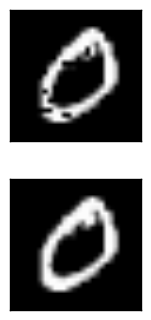

In [153]:
plt.figure(figsize=(20, 4))

# display original
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(x[1].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display noise
ax = plt.subplot(2, n, i + 1)
plt.imshow(x_noise[1].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [154]:
encoding_dim = 50  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

encoder, decoder, autoencoder = create_autoencoder(num_features, encoding_dim, learning_rate)

AE_noise = autoencoder.fit(X_train, X_train,
                nb_epoch=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train, X_train))

Train on 56000 samples, validate on 56000 samples
Epoch 1/120
56000/56000 [==============================] - 7s - loss: 0.3770 - val_loss: 0.2662
Epoch 2/120
56000/56000 [==============================] - 7s - loss: 0.2604 - val_loss: 0.2546
Epoch 3/120
56000/56000 [==============================] - 7s - loss: 0.2471 - val_loss: 0.2386
Epoch 4/120
56000/56000 [==============================] - 7s - loss: 0.2303 - val_loss: 0.2224
Epoch 5/120
56000/56000 [==============================] - 7s - loss: 0.2161 - val_loss: 0.2103
Epoch 6/120
56000/56000 [==============================] - 7s - loss: 0.2056 - val_loss: 0.2013
Epoch 7/120
56000/56000 [==============================] - 7s - loss: 0.1976 - val_loss: 0.1941
Epoch 8/120
56000/56000 [==============================] - 7s - loss: 0.1912 - val_loss: 0.1883
Epoch 9/120
56000/56000 [==============================] - 7s - loss: 0.1857 - val_loss: 0.1832
Epoch 10/120
56000/56000 [==============================] - 7s - loss: 0.1809 - val_lo

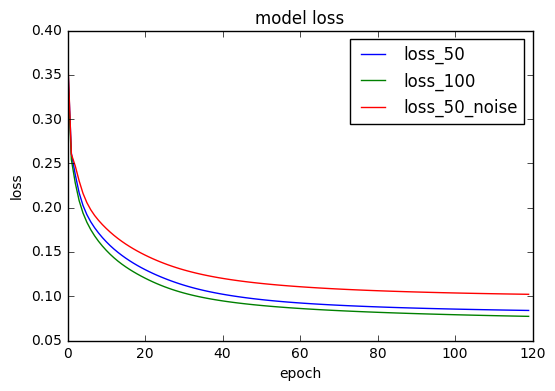

In [155]:
loss_list = AE_50.history.get('loss')
val_loss_list = AE_50.history.get('val_loss')

loss_list_100 = AE_100.history.get('loss')
val_loss_list_100 = AE_100.history.get('val_loss')

loss_list_noise = AE_noise.history.get('loss')
val_loss_list_noise = AE_noise.history.get('val_loss')

# summarize history for loss
plt.plot(loss_list)
plt.plot(loss_list_100)
plt.plot(loss_list_noise)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss_50','loss_100','loss_50_noise'], loc='upper right')
plt.show()

**4. Visualize the learnt weights.**

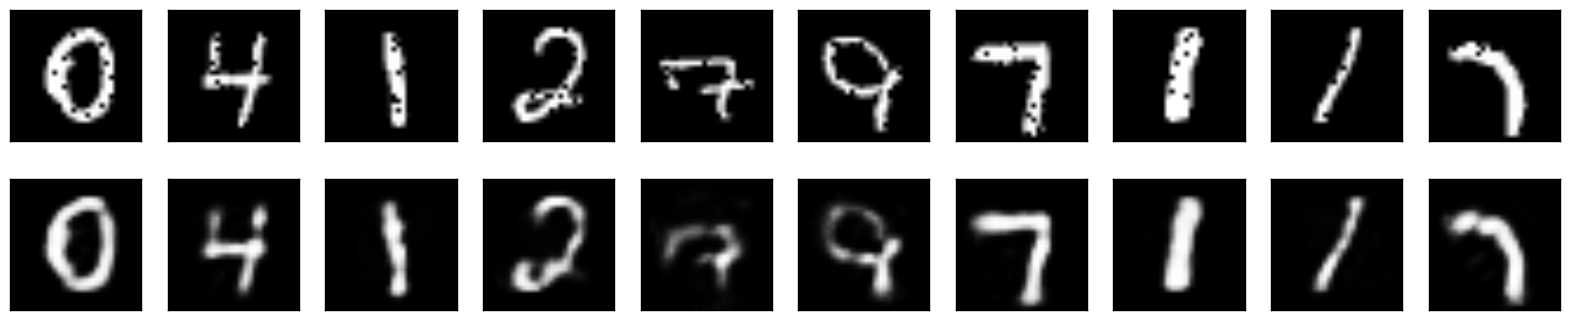

In [156]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [161]:
encoded_imgs[0]

array([ 11.23116875,  11.81795406,  16.62273788,   5.82690811,
         7.60085297,  14.67948723,  12.54422855,  13.02203178,
         6.69410706,  10.79854774,  11.49174309,   1.15980458,
        13.02357006,   4.41621733,  11.22258377,   7.83780479,
         0.5041573 ,   6.19942284,   3.72585249,   9.45307541,
         6.51563311,   5.03334141,   7.80504513,   0.94563299,
        13.53200626,   7.29923868,   4.4769578 ,   5.75664186,
         1.49170995,   4.54122305,   2.74935579,   4.92873287,
         6.82516861,   7.13993025,   6.36260128,  12.50532627,
         5.57627773,   7.51319027,   8.14396572,  10.04990959,
         5.87252045,  14.74208069,   7.59012985,   0.65687144,
         9.0805769 ,   6.30853367,   3.85516405,   4.87841368,
         6.00408363,   5.59112501], dtype=float32)

In [157]:
AE_noise.model.layers[1].get_weights()[0].shape, AE_noise.model.layers[1].get_weights()[1].shape


((784, 50), (50,))

In [158]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

W shape :  (50,)


NameError: name 'nice_imshow' is not defined

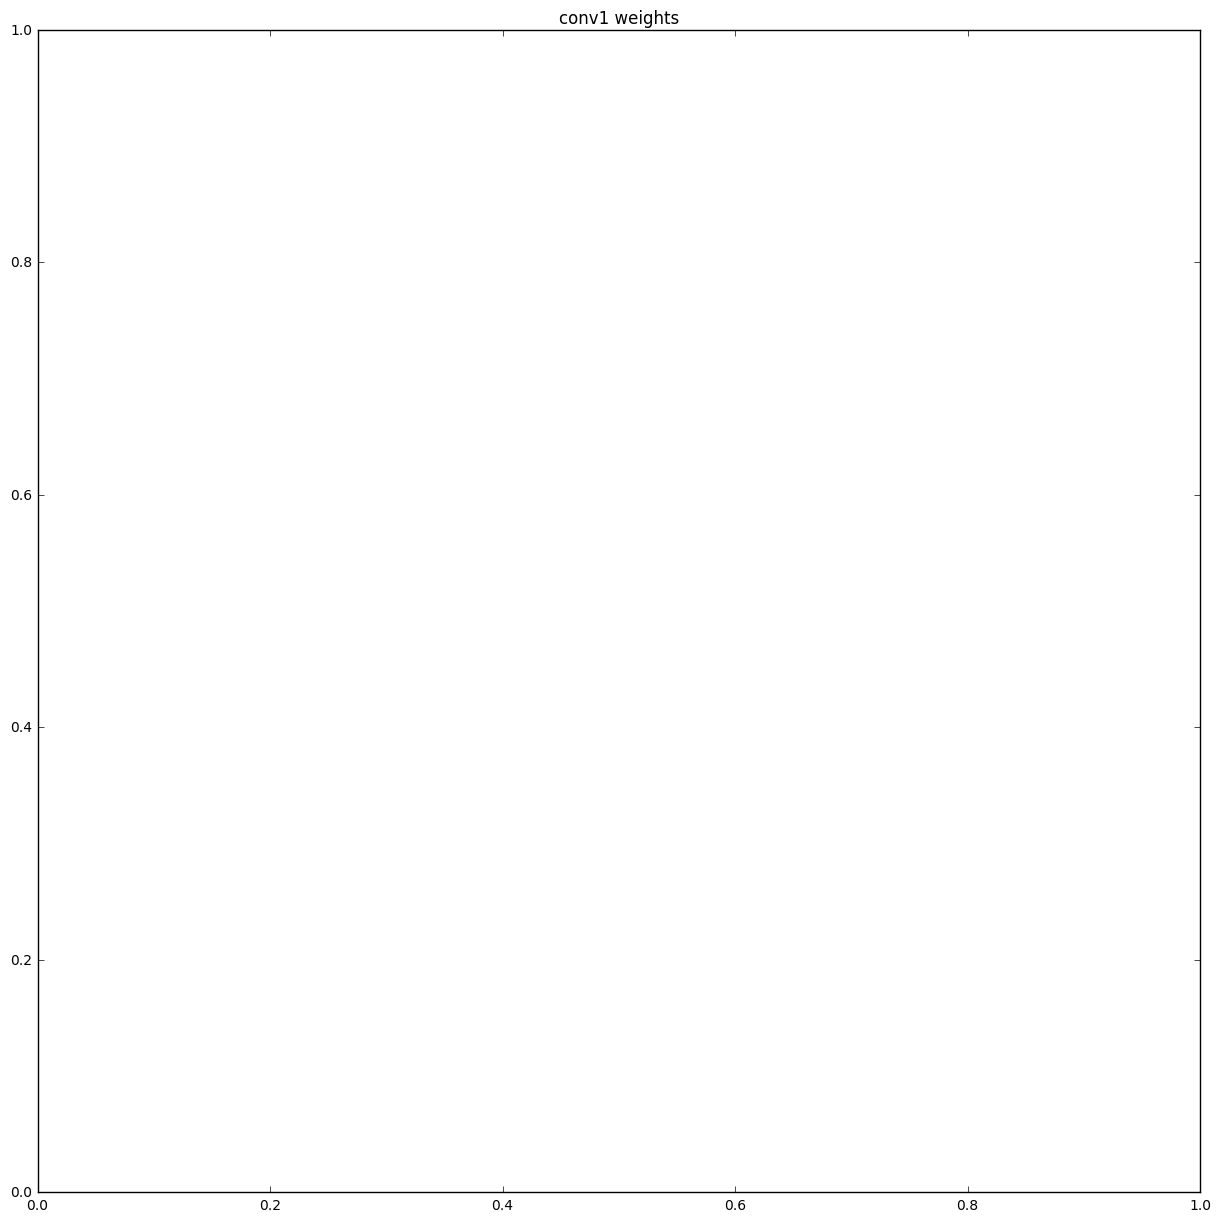

In [159]:
# Visualize weights
W = AE_noise.model.layers[1].get_weights()[1]
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plot.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)

In [ ]:
        def visualize_weights(self):
        tile_size = (int(numpy.sqrt(self.W1[0].size)), int(numpy.sqrt(self.W1[0].size)))

        panel_shape = (10, 10)
        return utils.visualize_weights(self.W1, panel_shape, tile_size)
        #panel_shape = (int(numpy.sqrt(self.W1.shape[0])), int(numpy.sqrt(self.W1.shape[0])))
        #return utils.visualize_weights(self.W1, panel_shape, tile_size)

    img = ae.visualize_weights()
    img.save(save_name + ".bmp")
    if args.visualize:    
        img.show()
    ae.dump_weights(save_name + '.pkl')

In [ ]:

# Visualize weights
W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)